In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings; 
warnings.filterwarnings('ignore')


In [10]:
anime = pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [11]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Data Preprocessing


In [12]:
# Check columns
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [13]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [14]:

# Episodes columns should be numeric insted of object
# Rating and genre columns have most null values

In [15]:
anime.rating

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12294, dtype: float64

In [16]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [17]:
# Dropping Null values
anime_no_null = anime.dropna(axis=0)

In [18]:
anime_no_null

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [19]:
anime_no_null.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [20]:
anime_df = anime_no_null.copy()

In [21]:
# Converting the episodes with Numeric Values to Integers
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'],errors='coerce')

In [22]:
anime_df['episodes']

0         1.0
1        64.0
2        51.0
3        24.0
4        51.0
         ... 
12289     1.0
12290     1.0
12291     4.0
12292     1.0
12293     1.0
Name: episodes, Length: 12017, dtype: float64

In [23]:

# checking episodes with NAN values.

anime_df[anime_df['episodes'].isna()]
     

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,NaN,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,NaN,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,NaN,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,NaN,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,NaN,7.72,5400
...,...,...,...,...,...,...,...
11648,32238,"Watashi wa, Kairaku Izonshou",Hentai,OVA,NaN,6.32,1569
11752,28169,Buta no Gotoki Sanzoku ni Torawarete Shojo wo ...,Hentai,OVA,NaN,6.14,1992
12024,30770,Maid-san to Boin Damashii,"Harem, Hentai",OVA,NaN,5.71,1498
12045,33125,Shiiku x Kanojo: Tenshi no Kousoku-hen,Hentai,OVA,NaN,5.68,1326


In [24]:
# Dropping Rows with NAN in Episodes.

anime_df.dropna(axis=0,inplace=True)
anime_df[anime_df['episodes'].isna()]

,anime_id,name,genre,type,episodes,rating,members


In [25]:

# Check for Dupicates.
anime_df.duplicated().sum()

0

## EDA

Text(0.5, 1.0, 'Anime Average Rating Distribution')

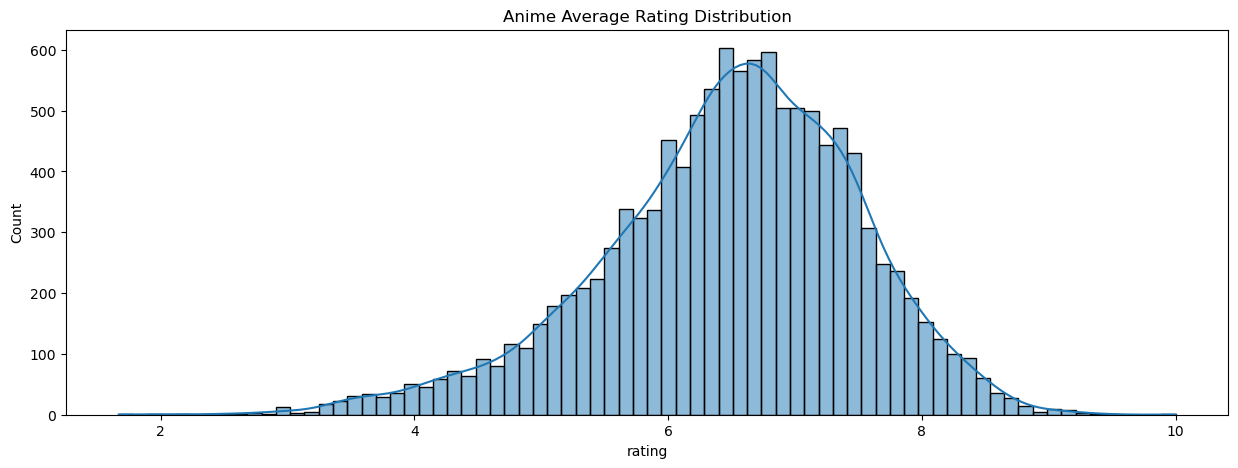

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(data=anime_df,x='rating',kde=True)
plt.title('Anime Average Rating Distribution')

Text(0.5, 1.0, 'Anime Types')

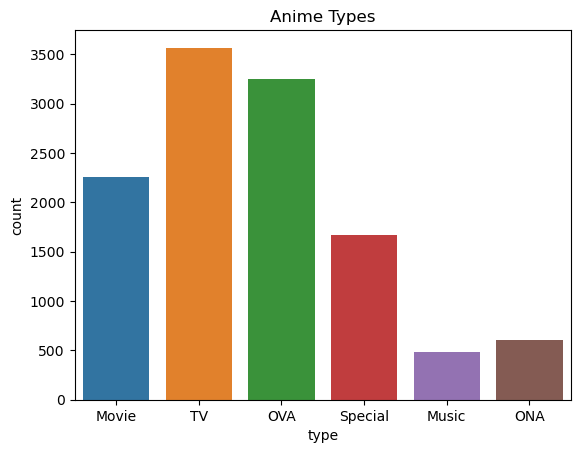

In [27]:
sns.countplot(data=anime_df,x='type')
plt.title('Anime Types')

Text(0.5, 1.0, 'Top 10 Genres')

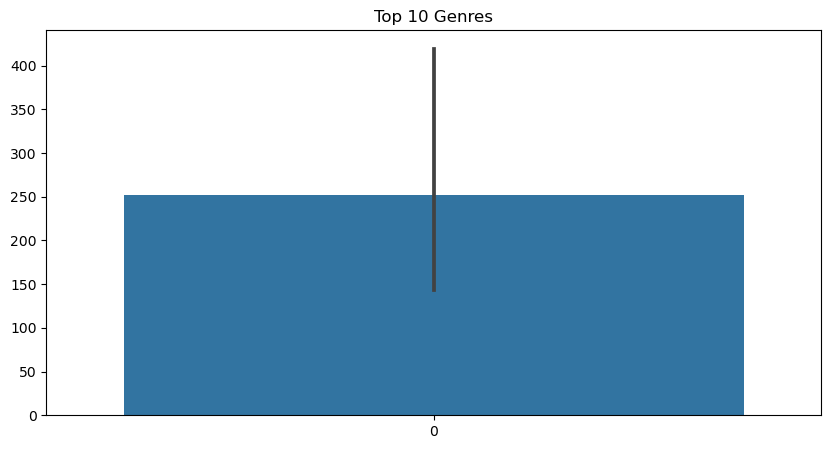

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(anime_df['genre'].value_counts().head(10))
plt.title('Top 10 Genres')
     

In [29]:
top_10 =anime_df.sort_values(by='rating',ascending=False).head(10)
top_10

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1.0,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10.0,9.15,93351


Text(0.5, 1.0, 'Top 10 Anime rating by Type')

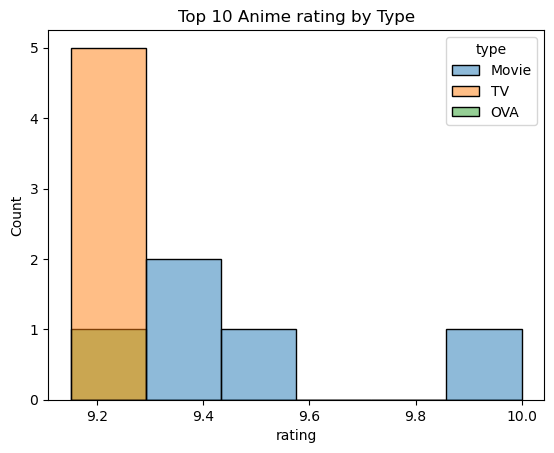

In [30]:
sns.histplot(data=top_10,x='rating',hue='type')
plt.title('Top 10 Anime rating by Type')

Text(0.5, 1.0, 'Top 10 Anime by Rating')

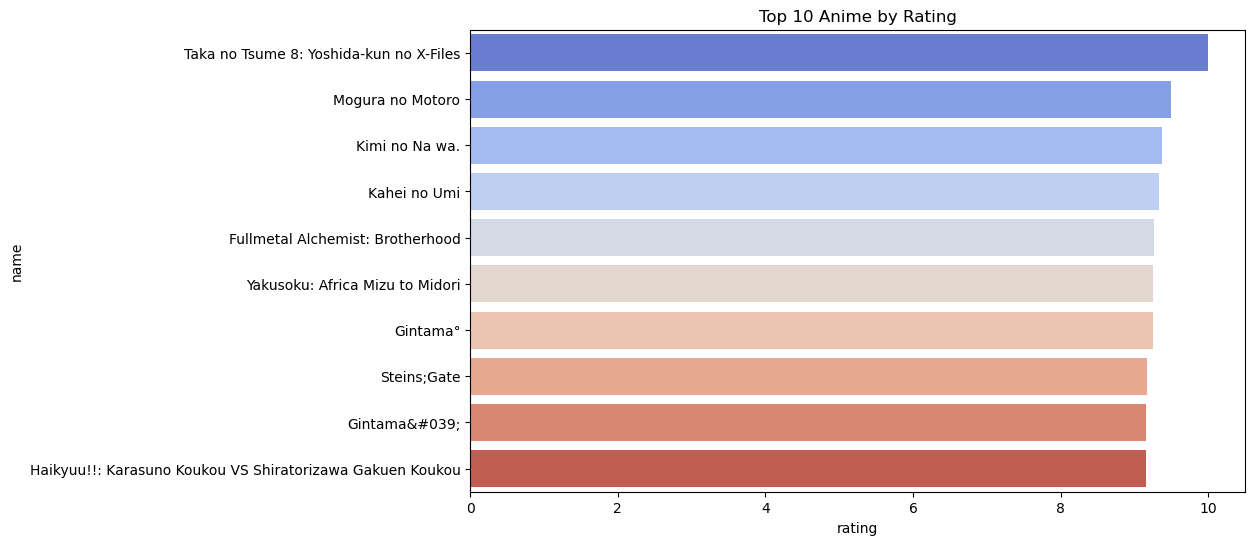

In [31]:
# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='name', data=top_10, palette='coolwarm')
plt.title('Top 10 Anime by Rating')

In [32]:
anime_df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

Text(0.5, 1.0, 'Correlation Matrix - Numerical Columns')

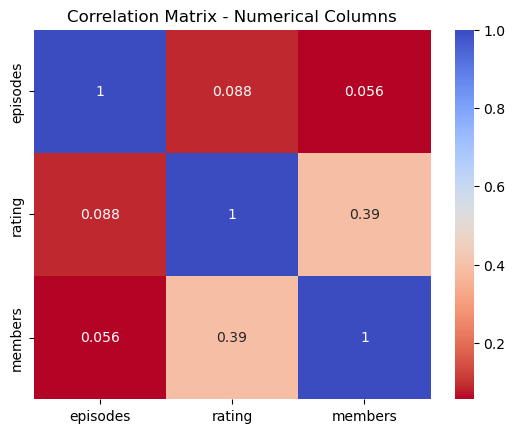

In [33]:
sns.heatmap(anime_df[['episodes', 'rating', 'members']].corr(),cmap='coolwarm_r',annot=True)
plt.title('Correlation Matrix - Numerical Columns')

The number of episodes does not show any significant correlation with anime ratings or the number of community members. However, there is a weak positive correlation between the ratings and the number of community members.

In [34]:
anime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,11830.0,13404.150211,11110.087616,1.00,3326.2500,9820.50,23302.50,34519.0
episodes,11830.0,12.486729,47.097131,1.00,1.0000,2.00,12.00,1818.0
rating,11830.0,6.484609,1.019147,1.67,5.8925,6.57,7.19,10.0
members,11830.0,18511.002790,55371.439012,12.00,232.2500,1589.50,9832.00,1013917.0


<Axes: xlabel='rating', ylabel='members'>

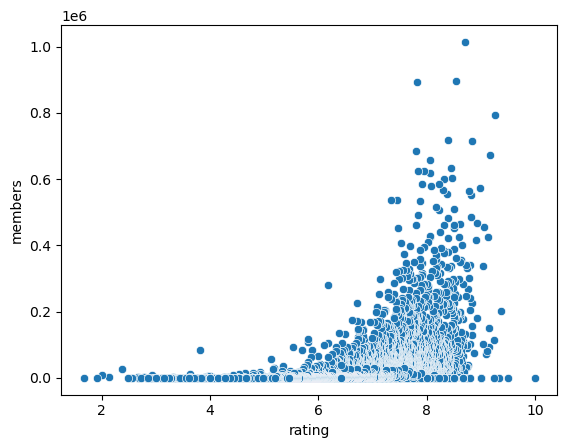

In [35]:
sns.scatterplot(data=anime_df,x='rating',y='members')

## EDA

.TV is the most popular type of anime, with TV series attracting a large community following. Hentai stands out as the most common genre.

. Among anime types, TV shows have the largest number of community members, followed by movies and OVAs.

. Notably, Death Note and Shingeki no Kyojin rank as some of the most popular anime. 

. all of the top 10 highest-rated anime are TV shows, with Sen to Chihiro no Kamikakushi being the most popular among them. Additionally, Okayo Club and Doraemon have the highest number of episodes.

## Feature Extraction

In [36]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


## Genre feature Extraction

In [37]:
anime_genre_split = anime_df['genre'].str.get_dummies(', ')
anime_genre_split

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
anime_df.drop('genre',axis=1,inplace=True)

In [39]:
anime_df_genre = pd.concat([anime_df,anime_genre_split],axis=1)
anime_df_genre

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,9.17,673572,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51.0,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,OVA,1.0,4.15,211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,5543,Under World,OVA,1.0,4.28,183,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,5621,Violence Gekiga David no Hoshi,OVA,4.0,4.88,219,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,OVA,1.0,4.98,175,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
anime_df.isna().any()

anime_id    False
name        False
type        False
episodes    False
rating      False
members     False
dtype: bool

In [41]:
anime_df.head()

,anime_id,name,type,episodes,rating,members
0,32281,Kimi no Na wa.,Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665
2,28977,Gintama°,TV,51.0,9.25,114262
3,9253,Steins;Gate,TV,24.0,9.17,673572
4,9969,Gintama&#039;,TV,51.0,9.16,151266


## Type - Feature Extraction

In [42]:
anime_df_types_split = pd.get_dummies(anime_df_genre['type'],dtype=int)
anime_df_types_split

,Movie,Music,ONA,OVA,Special,TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
12289,0,0,0,1,0,0
12290,0,0,0,1,0,0
12291,0,0,0,1,0,0
12292,0,0,0,1,0,0


In [43]:
anime_type = anime_df_genre.drop('type',axis=1)

In [44]:
anime_type = pd.concat([anime_type,anime_df_types_split],axis=1)

In [45]:
anime_type.head()
   

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## Normalizing the Rating in anime Dataset

In [46]:
anime_encoded=anime_type.copy()

In [47]:
anime_encoded

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1.0,4.15,211,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12290,5543,Under World,1.0,4.28,183,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12291,5621,Violence Gekiga David no Hoshi,4.0,4.88,219,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1.0,4.98,175,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
anime_encoded.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# Normalizing the Ratings -  To make ratings compareable.
# (rating-min)/(max-min)
anime_normalized_rating = anime_encoded.copy()
anime_rating = anime_normalized_rating['rating']
anime_normalized_rating['nor_rating'] = (anime_rating-anime_rating.min())/(anime_rating.max()-anime_rating.min())
     

In [50]:
anime_normalized_rating.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.924370
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.911164
2,28977,Gintama°,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.909964
3,9253,Steins;Gate,24.0,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
4,9969,Gintama&#039;,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.899160


## Recommendation System

In [51]:
anime_recommend = anime_normalized_rating.drop(['rating','members','anime_id'],axis=1)
anime_recommend

,name,episodes,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
0,Kimi no Na wa.,1.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.924370
1,Fullmetal Alchemist: Brotherhood,64.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.911164
2,Gintama°,51.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.909964
3,Steins;Gate,24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
4,Gintama&#039;,51.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.899160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.297719
12290,Under World,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.313325
12291,Violence Gekiga David no Hoshi,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.385354
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.397359


In [52]:
anime_recommend.index= anime_normalized_rating['name']
anime_recommend.drop('name',axis=1,inplace=True)

In [53]:
anime_recommend.head()

,episodes,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.924370
Fullmetal Alchemist: Brotherhood,64.0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0.911164
Gintama°,51.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.909964
Steins;Gate,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
Gintama&#039;,51.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.899160


In [54]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine,correlation


In [55]:
item_sim = 1- pairwise_distances(anime_recommend,metric='cosine')

In [57]:
item_sim.shape

(11830, 11830)

In [58]:
np.fill_diagonal(item_sim,0)

In [59]:
item_sim_df =pd.DataFrame(item_sim,index=anime_recommend.index,columns=anime_recommend.index)
item_sim_df

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.392528,0.387598,0.393901,0.387525,0.474180,0.384042,0.388202,0.344699,0.396036,...,0.293304,0.356675,0.359908,0.280882,0.281704,0.277146,0.279850,0.390573,0.293887,0.516275
Fullmetal Alchemist: Brotherhood,0.392528,0.000000,0.998403,0.996816,0.998404,0.972338,0.999299,0.999084,0.333193,0.978360,...,0.565532,0.810071,0.809011,0.569749,0.569504,0.570803,0.570049,0.939220,0.565306,0.561418
Gintama°,0.387598,0.998403,0.000000,0.997313,1.000000,0.973205,0.998680,0.998391,0.367826,0.986232,...,0.565981,0.810057,0.809036,0.570050,0.569815,0.571060,0.570338,0.938966,0.565762,0.561986
Steins;Gate,0.393901,0.996816,0.997313,0.000000,0.997309,0.971695,0.997083,0.997151,0.342384,0.980470,...,0.569421,0.811407,0.810592,0.572692,0.572509,0.573467,0.572915,0.939236,0.569240,0.566068
Gintama&#039;,0.387525,0.998404,1.000000,0.997309,0.000000,0.973190,0.998682,0.998393,0.367767,0.986222,...,0.565936,0.810032,0.809008,0.570014,0.569778,0.571026,0.570303,0.938950,0.565717,0.561934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.277146,0.570803,0.571060,0.573467,0.571026,0.565296,0.569955,0.575416,0.230081,0.566097,...,0.998579,0.943546,0.943941,0.999927,0.999891,0.000000,0.999962,0.816720,0.998472,0.678512
Under World,0.279850,0.570049,0.570338,0.572915,0.570303,0.565196,0.569131,0.574602,0.232254,0.565819,...,0.999007,0.943289,0.943777,0.999994,0.999982,0.999962,0.000000,0.816264,0.998917,0.679719
Violence Gekiga David no Hoshi,0.390573,0.939220,0.938966,0.939236,0.938950,0.916393,0.939367,0.941587,0.325781,0.921478,...,0.812970,0.961745,0.961271,0.816073,0.815913,0.816720,0.816264,0.000000,0.812787,0.678371


In [60]:
item_sim_df.head()

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.392528,0.387598,0.393901,0.387525,0.474180,0.384042,0.388202,0.344699,0.396036,...,0.293304,0.356675,0.359908,0.280882,0.281704,0.277146,0.279850,0.390573,0.293887,0.516275
Fullmetal Alchemist: Brotherhood,0.392528,0.000000,0.998403,0.996816,0.998404,0.972338,0.999299,0.999084,0.333193,0.978360,...,0.565532,0.810071,0.809011,0.569749,0.569504,0.570803,0.570049,0.939220,0.565306,0.561418
Gintama°,0.387598,0.998403,0.000000,0.997313,1.000000,0.973205,0.998680,0.998391,0.367826,0.986232,...,0.565981,0.810057,0.809036,0.570050,0.569815,0.571060,0.570338,0.938966,0.565762,0.561986
Steins;Gate,0.393901,0.996816,0.997313,0.000000,0.997309,0.971695,0.997083,0.997151,0.342384,0.980470,...,0.569421,0.811407,0.810592,0.572692,0.572509,0.573467,0.572915,0.939236,0.569240,0.566068
Gintama&#039;,0.387525,0.998404,1.000000,0.997309,0.000000,0.973190,0.998682,0.998393,0.367767,0.986222,...,0.565936,0.810032,0.809008,0.570014,0.569778,0.571026,0.570303,0.938950,0.565717,0.561934


In [61]:
item_sim_df.sort_values(by='Kimi no Na wa.',ascending=False).T.head()

name,Aura: Maryuuin Kouga Saigo no Tatakai,Kokoro ga Sakebitagatterunda.,Harmonie,Air Movie,Hotarubi no Mori e,&quot;Bungaku Shoujo&quot; Movie,Clannad Movie,Taifuu no Noruda,Momo e no Tegami,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,...,Ten Little Gall Force,Platonic Chain: Ansatsu Jikkouchuu,Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z!,Ultraman M78 Gekijou: Love and Peace,Computer Obaachan,Soujuu Senshi Psychic Wars,Generation of Chaos,Qin Shiming Yue Zhi: Guoqing Tebie Pian,Ojarumaru: Wasureta Mori no Hinata,Kimi no Na wa.
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.928521,0.923068,0.920630,0.920096,0.851828,0.847385,0.845790,0.838863,0.838769,0.837526,...,0.191258,0.190978,0.188407,0.187366,0.184908,0.183884,0.180384,0.175989,0.175684,0.000000
Fullmetal Alchemist: Brotherhood,0.373727,0.432079,0.437127,0.437897,0.396700,0.401555,0.408962,0.406878,0.481145,0.476370,...,0.339957,0.499462,0.331784,0.351203,0.356951,0.413980,0.400452,0.389029,0.389048,0.392528
Gintama°,0.375892,0.426452,0.431280,0.432015,0.391585,0.396204,0.397405,0.409013,0.474765,0.477260,...,0.355844,0.508941,0.331156,0.372055,0.365492,0.415632,0.384484,0.399478,0.384759,0.387598
Steins;Gate,0.373313,0.432362,0.436465,0.437079,0.397272,0.401067,0.402027,0.421490,0.480756,0.482942,...,0.346953,0.519119,0.316342,0.368478,0.368610,0.408594,0.378566,0.378561,0.378558,0.393901
Gintama&#039;,0.375837,0.426383,0.431219,0.431954,0.391518,0.396146,0.397350,0.408968,0.474693,0.477192,...,0.355806,0.508943,0.331115,0.372024,0.365463,0.415617,0.384463,0.399461,0.384741,0.387525


In [68]:
# Clearing RAM
import gc
gc.collect()

7262

Enter Anime Name for Recommendations:
Harmonie
Enter Similarity Score Threshold:
0.75

**********
TOP ANIME SIMILAR TO: Harmonie
WITH SIMILARITY SCORE > 0.75
**********
Total Recommendations: 88 Anime


name
Kimi no Na wa.                                                    0.920630
Taifuu no Noruda                                                  0.915871
Momo e no Tegami                                                  0.904323
Shiranpuri (Movie)                                                0.902662
Shisha no Sho                                                     0.902232
Aura: Maryuuin Kouga Saigo no Tatakai                             0.856715
Sen to Chihiro no Kamikakushi                                     0.819950
Koe no Katachi                                                    0.819948
Kokoro ga Sakebitagatterunda.                                     0.819554
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. Movie    0.819379
Colorful (Movie)                                                  0.819173
Angel Beats!: Another Epilogue                                    0.818252
Momoko, Kaeru no Uta ga Kikoeru yo.                               0.818067
Air Movie           

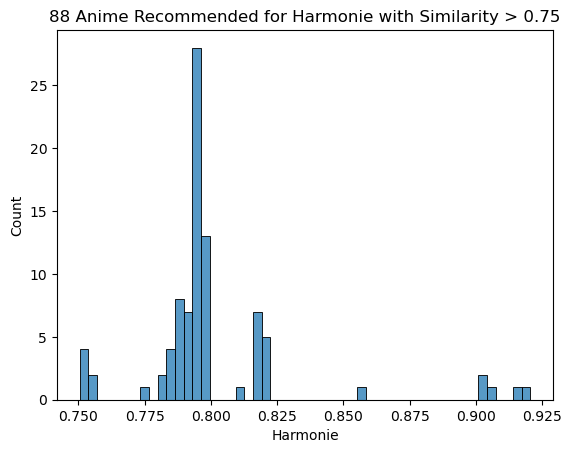

In [69]:
# Input: Target Anime and Similarity Threshold
anime_name_input = input('Enter Anime Name for Recommendations:\n')
similarity_score_threshold = float(input('Enter Similarity Score Threshold:\n'))

# Displaying the input criteria
print(f"\n**********\nTOP ANIME SIMILAR TO: {anime_name_input}")
print(f"WITH SIMILARITY SCORE > {similarity_score_threshold}\n**********")

# Sorting and filtering recommendations based on similarity threshold
top_anime_recommendations = item_sim_df[anime_name_input].sort_values(ascending=False)
top_recommendations = top_anime_recommendations[top_anime_recommendations > similarity_score_threshold]

# Display total number of recommendations and plot the distribution
print(f"Total Recommendations: {top_recommendations.shape[0]} Anime")
sns.histplot(top_recommendations)
plt.title(f"{top_recommendations.shape[0]} Anime Recommended for {anime_name_input} with Similarity > {similarity_score_threshold}")

# Display the top 20 recommendations
top_recommendations.head(20)


## Evaluation

In [71]:
from sklearn.model_selection import train_test_split

# Assuming you have user-anime interaction data (user ratings)
train_data, test_data = train_test_split(anime_df, test_size=0.2, random_state=42)

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Here you'd compare the recommended anime list to the true test data
# For the sake of example, let's assume `y_true` and `y_pred` are binary labels

y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]  # Example: 1 means relevant, 0 means not relevant
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]  # Example: Recommendations made by your system

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Precision: 0.720
Recall: 0.700
F1-Score: 0.703


## Interview Questions:


## 1. Difference between User-Based and Item-Based Collaborative Filtering:

->User-Based Collaborative Filtering:

It recommends items based on the similarity between users.

It looks for users who have similar preferences or behaviors and suggests items that those similar users have liked.

->Item-Based Collaborative Filtering:

It recommends items based on the similarity between items.

It looks for items that are similar to what the user has already liked or interacted with.

## 2. What is Collaborative Filtering, and How Does It Work?

Collaborative filtering is a technique used in recommendation systems to suggest items (e.g., anime, movies) by analyzing patterns of user behavior.

It works by finding similarities either between users or between items based on past interactions (like ratings, likes, or purchases).
